<a href="https://colab.research.google.com/github/sdmuzel/API_Pandas_on_Spark/blob/main/projeto_pokemon_in_koalas_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados dos Pokémons

# Conhecendo os dados

- name: O nome em inglês do Pokémon
- japanese_name: O nome japonês original do Pokémon
- pokedex_number: O número de entrada do Pokémon no National Pokedex
- percentage_male: A porcentagem das espécies que são machos. Em branco se o Pokémon não tiver gênero.
- type1: O tipo primário do Pokémon
- type2: O Tipo Secundário do Pokémon
- classification: A classificação do Pokémon conforme descrito pela Pokédex do Sol e da Lua
- height_m: Altura do Pokémon em metros
- weight_kg: O Peso do Pokémon em quilogramas
- capture_rate: Taxa de Captura do Pokémon
- base_egg_steps: O número de passos necessários para chocar um ovo do Pokémon
- abilities: Uma lista restrita de habilidades que o Pokémon é capaz de ter
- experience_growth: O Crescimento da Experiência do Pokémon
- base_happiness: Felicidade Base do Pokémon
- against_?: Dezoito recursos que denotam a quantidade de dano recebido contra um ataque de um tipo específico
- hp: O HP Base do Pokémon
- attack: O Ataque Base do Pokémon
- defese: A Defesa Base do Pokémon
- sp_attack: O Ataque Especial Base do Pokémon
- sp_defense: A Defesa Especial Base do Pokémon
- speed: A velocidade base do Pokémon
- generation: A geração numerada que o Pokémon foi introduzido pela primeira vez
- is_legendary: Indica se o Pokémon é lendário

# Importanto e Salvando os dados

link dos dados: https://raw.githubusercontent.com/sdmuzel/Databricks/main/pokemon.csv

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
      .appName("Pokemon")\
      .getOrCreate()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [ ]:
from pyspark import SparkFiles

url = 'https://raw.githubusercontent.com/sdmuzel/Databricks/main/pokemon.csv'

spark.sparkContext.addFile(url)
path  = 'file://' + SparkFiles.get('pokemon.csv')

df = spark.read.csv(path, header=True, sep=',', inferSchema=True)

display(df)

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,null,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,null,19.0,1,0
"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,null,9.0,1,0
"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,null,22.5,1,0
"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,null,85.5,1,0
"['Shield Dust', 'Run Away']",1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50.0,10,20,20,45,bug,null,2.9,1,0


In [ ]:
import numpy as np
import pyspark.pandas as ps

In [ ]:
# option para poder criar novas colunas
ps.set_option('compute.ops_on_diff_frames', True)

In [ ]:
df = df.pandas_api()
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,None,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,None,19.0,1,0


In [ ]:
# criando uma pasta
dbutils.fs.mkdirs ('/aulas_databricks/pokemon/')

# verificando a criação da pasta
dbutils.fs.ls('/aulas_databricks/')


# OBS: fiz o projeto em uma conta diferente então só tem essa pasta no momento, mas na conta do aluno deveria ter o que foi feito nos cursos 1, 2 e 3

Out[5]: [FileInfo(path='dbfs:/aulas_databricks/pokemon/', name='pokemon/', size=0, modificationTime=0)]

In [ ]:
#salvando o arquivo
path="/aulas_databricks/pokemon/pokemon.csv"
df.to_csv(path)

In [ ]:
dbutils.fs.ls ('aulas_databricks/pokemon/')

Out[8]: [FileInfo(path='dbfs:/aulas_databricks/pokemon/pokemon.csv/', name='pokemon.csv/', size=0, modificationTime=0)]

# Explorando os dados

In [ ]:
# lendo arquivo CSV
path="/aulas_databricks/pokemon/pokemon.csv"
df = ps.read_csv(path)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,None,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,None,19.0,1,0


In [ ]:
df.describe().round(2)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,801.00,781.00,801.00,703.00,801.00,801.00,801.00,801.00,781.00,801.00,801.00
mean,1.00,1.06,0.97,1.07,1.07,1.07,1.14,1.19,0.99,1.03,1.10,1.21,0.89,0.98,1.01,1.25,0.98,1.06,77.86,7191.01,65.36,428.38,73.01,1054995.91,1.16,68.96,55.16,401.00,71.31,70.91,66.33,61.38,3.69,0.09
std,0.60,0.44,0.35,0.65,0.52,0.72,0.69,0.60,0.56,0.79,0.74,0.74,0.27,0.55,0.50,0.70,0.50,0.61,32.16,6558.22,19.60,119.20,30.77,160255.84,1.08,26.58,20.26,231.37,32.35,27.94,28.91,109.35,1.93,0.28
min,0.25,0.25,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.25,0.25,5.00,1280.00,0.00,180.00,5.00,600000.00,0.10,1.00,0.00,1.00,10.00,20.00,5.00,0.10,1.00,0.00
25%,0.50,1.00,1.00,0.50,1.00,0.50,0.50,1.00,1.00,0.50,1.00,0.50,1.00,0.50,1.00,1.00,0.50,0.50,55.00,5120.00,70.00,320.00,50.00,1000000.00,0.60,50.00,50.00,201.00,45.00,50.00,45.00,9.00,2.00,0.00
50%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,75.00,5120.00,70.00,435.00,70.00,1000000.00,1.00,65.00,50.00,401.00,65.00,66.00,65.00,27.30,4.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,100.00,6400.00,70.00,505.00,90.00,1059860.00,1.50,80.00,50.00,601.00,91.00,90.00,85.00,64.80,5.00,0.00
max,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00,4.00,4.00,4.00,4.00,4.00,185.00,30720.00,140.00,780.00,230.00,1640000.00,14.50,255.00,100.00,801.00,194.00,230.00,180.00,999.90,7.00,1.00


In [ ]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 

In [ ]:
df.isna().sum()/len(df) *100

Out[9]: abilities             0.000000
against_bug           0.000000
against_dark          0.000000
against_dragon        0.000000
against_electric      0.000000
against_fairy         0.000000
against_fight         0.000000
against_fire          0.000000
against_flying        0.000000
against_ghost         0.000000
against_grass         0.000000
against_ground        0.000000
against_ice           0.000000
against_normal        0.000000
against_poison        0.000000
against_psychic       0.000000
against_rock          0.000000
against_steel         0.000000
against_water         0.000000
attack                0.000000
base_egg_steps        0.000000
base_happiness        0.000000
base_total            0.000000
capture_rate          0.000000
classfication         0.000000
defense               0.000000
experience_growth     0.000000
height_m              2.496879
hp                    0.000000
japanese_name         0.000000
name                  0.000000
percentage_male      12.234707


Percebmos que temos  poucas colunas com dados nulos:
- type2:  quase metade é nulo, isso porque nem sempre o pokemon possui mais de um tipo.
- percentage_male:  Casos onde o pokemon não tem sexo
- height_m: informação ausente mesmo
- weight_kg: informação ausente mesmo

Para preencher esses dados nulos devemos ter 3 estratégis diferentes:

- % male: vou deixar como está para eu eu posso fazer alguns cálculos
- peso e altura:  vou preencher com valores médios dos demais pokemon
- type 2: vou colocar NA (não se aplica)

In [ ]:
df['type2'] = df['type2'].fillna('NA')
df['height_m'] = df['height_m'].fillna(df['height_m'].mean())
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].mean())

In [ ]:
df.isna().sum()

Out[5]: abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m              0
hp                    0
japanese_name         0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg             0
generation            0
is_legendary          0
dtype: i

Agora quero reordenar as colunas para facilitar na hora de procurar alguns dados no DataFrame, além disso não vou mais puxar os nomes dos pokémons em japones.

In [ ]:
df.columns

Out[12]: Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [ ]:
df = df[['pokedex_number', 'name', 'generation', 'is_legendary', 'classfication','abilities', 'type1', 'type2', 'percentage_male', 'weight_kg', 'height_m', 'hp', 'speed', 'attack', 'defense', 'sp_attack', 'sp_defense', 'base_total', 'base_egg_steps', 'base_happiness', 'capture_rate', 'experience_growth', 'against_bug', 'against_dark', 'against_dragon','against_electric', 'against_fairy', 'against_fight', 'against_fire','against_flying', 'against_ghost', 'against_grass', 'against_ground','against_ice', 'against_normal', 'against_poison', 'against_psychic','against_rock', 'against_steel', 'against_water']]

df.head()

,pokedex_number,name,generation,is_legendary,classfication,abilities,type1,type2,percentage_male,weight_kg,height_m,hp,speed,attack,defense,sp_attack,sp_defense,base_total,base_egg_steps,base_happiness,capture_rate,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,6.9,0.7,45,45,49,49,65,65,318,5120,70,45,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,13.0,1.0,60,60,62,63,80,80,405,5120,70,45,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,100.0,2.0,80,80,100,123,122,120,625,5120,70,45,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,0,Lizard Pokémon,"['Blaze', 'Solar Power']",fire,NA,88.1,8.5,0.6,39,65,52,43,60,50,309,5120,70,45,1059860,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,0,Flame Pokémon,"['Blaze', 'Solar Power']",fire,NA,88.1,19.0,1.1,58,80,64,58,80,65,405,5120,70,45,1059860,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


Agora com as colunas ordenadas, vou verificar se os tipos dos dados estão OK, pois nateriomente não estava muito facil de avaliar

In [ ]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pokedex_number     801 non-null    int32  
 1   name               801 non-null    object 
 2   generation         801 non-null    int32  
 3   is_legendary       801 non-null    int32  
 4   classfication      801 non-null    object 
 5   abilities          801 non-null    object 
 6   type1              801 non-null    object 
 7   type2              801 non-null    object 
 8   percentage_male    703 non-null    float64
 9   weight_kg          801 non-null    float64
 10  height_m           801 non-null    float64
 11  hp                 801 non-null    int32  
 12  speed              801 non-null    int32  
 13  attack             801 non-null    int32  
 14  defense            801 non-null    int32  
 15  sp_attack          801 non-null    int32  
 16  sp_defense         801 

A coluna capture_rate está como string, mas deveria ser numérica, então  vou  mudar o tipo de dados, mas antes vou verificar o porque de ter sido considerada como  str

In [ ]:
df.capture_rate.unique()

Out[15]: 0                          125
1                          205
2                           15
3                          155
4                          200
5                            3
6                           30
7                          160
8                           35
9                          100
10                          70
11                          75
12                         140
13                         120
14                         130
15    30 (Meteorite)255 (Core)
16                          90
17                          60
18                          55
19                         220
20                          25
21                         190
22                         150
23                         170
24                         180
25                         127
26                         255
27                         235
28                         225
29                          65
30                          80
31                          50

Em alguma linha foi adicinado um valor  erroneo : 30 (Meteorite)255 (Core). Vamos verificar para qual pokémon isso ocorreu e fazer algumas pesquisas para poder trocar esse valor.

In [ ]:
df[df.capture_rate== "30 (Meteorite)255 (Core)"]

,pokedex_number,name,generation,is_legendary,classfication,abilities,type1,type2,percentage_male,weight_kg,height_m,hp,speed,attack,defense,sp_attack,sp_defense,base_total,base_egg_steps,base_happiness,capture_rate,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
773,774,Minior,7,0,Meteor Pokémon,['Shields Down'],rock,flying,NaN,40.0,0.3,60,120,100,60,100,60,500,6400,70,30 (Meteorite)255 (Core),1059860,0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0


In [ ]:
df["capture_rate"] = df["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'})
df["capture_rate"] = df["capture_rate"].astype('int')

quero fazer algumas análises com relação a quantidae de machos e femeas, então vou criar uma coluna percentage_famale

In [ ]:
df['percentage_famale'] = 100 - df['percentage_male']


df = df[['pokedex_number', 'name', 'generation', 'is_legendary', 'classfication',
       'abilities', 'type1', 'type2', 'percentage_male','percentage_famale', 'weight_kg',
       'height_m', 'hp', 'speed', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'base_total', 'base_egg_steps', 'base_happiness',
       'capture_rate', 'experience_growth', 'against_bug', 'against_dark',
       'against_dragon', 'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal', 'against_poison',
       'against_psychic', 'against_rock', 'against_steel', 'against_water']]

df.head(10)

,pokedex_number,name,generation,is_legendary,classfication,abilities,type1,type2,percentage_male,percentage_famale,weight_kg,height_m,hp,speed,attack,defense,sp_attack,sp_defense,base_total,base_egg_steps,base_happiness,capture_rate,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,11.9,6.9,0.7,45,45,49,49,65,65,318,5120,70,45,1059860,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,11.9,13.0,1.0,60,60,62,63,80,80,405,5120,70,45,1059860,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,11.9,100.0,2.0,80,80,100,123,122,120,625,5120,70,45,1059860,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,0,Lizard Pokémon,"['Blaze', 'Solar Power']",fire,NA,88.1,11.9,8.5,0.6,39,65,52,43,60,50,309,5120,70,45,1059860,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,0,Flame Pokémon,"['Blaze', 'Solar Power']",fire,NA,88.1,11.9,19.0,1.1,58,80,64,58,80,65,405,5120,70,45,1059860,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
5,6,Charizard,1,0,Flame Pokémon,"['Blaze', 'Solar Power']",fire,flying,88.1,11.9,90.5,1.7,78,100,104,78,159,115,634,5120,70,45,1059860,0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0
6,7,Squirtle,1,0,Tiny Turtle Pokémon,"['Torrent', 'Rain Dish']",water,NA,88.1,11.9,9.0,0.5,44,43,48,65,50,64,314,5120,70,45,1059860,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
7,8,Wartortle,1,0,Turtle Pokémon,"['Torrent', 'Rain Dish']",water,NA,88.1,11.9,22.5,1.0,59,58,63,80,65,80,405,5120,70,45,1059860,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
8,9,Blastoise,1,0,Shellfish Pokémon,"['Torrent', 'Rain Dish']",water,NA,88.1,11.9,85.5,1.6,79,78,103,120,135,115,630,5120,70,45,1059860,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
9,10,Caterpie,1,0,Worm Pokémon,"['Shield Dust', 'Run Away']",bug,NA,50.0,50.0,2.9,0.3,45,45,30,35,20,20,195,3840,70,255,1000000,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0


## 1)Como a velocidade do Pokémon se relaciona com as estatísticas básicas?

os fatores básicos estou considerando:
- hp
- attack
- defense
- sp_attack
- sp_defense
- base_total

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
fig = (make_subplots(rows=3, cols=2)
       .add_trace(df.plot.scatter(x = 'speed', y = 'hp').data[0], row=1, col=1)
       .add_trace(df.plot.scatter(x = 'speed', y = 'attack').data[0], row=1, col=2)
       .add_trace(df.plot.scatter(x = 'speed', y = 'defense').data[0], row=2, col=1)
       .add_trace(df.plot.scatter(x = 'speed', y = 'sp_attack').data[0], row=2, col=2)
       .add_trace(df.plot.scatter(x = 'speed', y = 'sp_defense').data[0], row=3, col=1)
       .add_trace(df.plot.scatter(x = 'speed', y = 'base_total').data[0], row=3, col=2))


fig.update_layout(autosize=False,
                  width=1200,
                  height=1200)

fig['layout']['xaxis']['title']='Speed'
fig['layout']['xaxis2']['title']='Speed'
fig['layout']['xaxis3']['title']='Speed'
fig['layout']['xaxis4']['title']='Speed'
fig['layout']['xaxis5']['title']='Speed'
fig['layout']['xaxis6']['title']='Speed'



fig['layout']['yaxis']['title']='HP'
fig['layout']['yaxis2']['title']='Attack'
fig['layout']['yaxis3']['title']='Defense'
fig['layout']['yaxis4']['title']='Sp Attack'
fig['layout']['yaxis5']['title']='Sp Defense'
fig['layout']['yaxis6']['title']='Base Total'



fig.show()


In [ ]:
aux = df[['hp', 'defense', 'sp_defense', 'attack', 'sp_attack', 'speed', 'base_total']]

aux.corr().style.background_gradient(cmap="Reds")

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pearson(__correlation_output__). If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: MatrixUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.



,hp,defense,sp_defense,attack,sp_attack,speed,base_total
hp,1.000000,0.242378,0.366971,0.410616,0.365973,0.160760,0.620624
defense,0.242378,1.000000,0.526348,0.468915,0.241882,0.007934,0.629620
sp_defense,0.366971,0.526348,1.000000,0.265836,0.511496,0.225977,0.717434
attack,0.410616,0.468915,0.265836,1.000000,0.368154,0.352703,0.730134
sp_attack,0.365973,0.241882,0.511496,0.368154,1.000000,0.438981,0.741120
speed,0.160760,0.007934,0.225977,0.352703,0.438981,1.000000,0.547666
base_total,0.620624,0.629620,0.717434,0.730134,0.741120,0.547666,1.000000


Podemos dizer que :
 - A capacidade de ataque de um pokémon depende ligeiramente de sua velocidade
 - HP não parece estar relacionado com a velocidade
 - Quando análisado  a somatória das estaíticas básicas com relação a velocidade, nota-se que há uma relação linear positiva entre os dois, porém de intensidade média.

## 2)Como a altura e o peso de um Pokémon se correlacionam com as estatísticas básicas?

Peso

In [ ]:
peso = df[['weight_kg']]
peso['qtd'] = 1
peso_agrupado = peso.groupby('weight_kg').sum()
peso_agrupado.reset_index(inplace = True)

In [ ]:
peso_agrupado.plot.area(x = 'weight_kg', y = 'qtd')

In [ ]:

fig = (make_subplots(rows=4, cols=2)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'hp', trendline="ols").data[0], row=1, col=1)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'attack', trendline="ols").data[0], row=1, col=2)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'defense', trendline="ols").data[0], row=2, col=1)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'sp_attack', trendline="ols").data[0], row=2, col=2)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'sp_defense', trendline="ols").data[0], row=3, col=1)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'speed', trendline="ols").data[0], row=3, col=2)
       .add_trace(df.plot.scatter(x = 'weight_kg', y = 'base_total', trendline="ols").data[0], row=4, col=1))


fig.update_layout(autosize=False,
                  width=1200,
                  height=1200)

fig['layout']['xaxis']['title']='Weight kg'
fig['layout']['xaxis2']['title']='Weight kg'
fig['layout']['xaxis3']['title']='Weight kg'
fig['layout']['xaxis4']['title']='Weight kg'
fig['layout']['xaxis5']['title']='Weight kg'
fig['layout']['xaxis6']['title']='Weight kg'
fig['layout']['xaxis7']['title']='Weight kg'


fig['layout']['yaxis']['title']='HP'
fig['layout']['yaxis2']['title']='Attack'
fig['layout']['yaxis3']['title']='Defense'
fig['layout']['yaxis4']['title']='Sp Attack'
fig['layout']['yaxis5']['title']='Sp Defense'
fig['layout']['yaxis6']['title']='Speed'
fig['layout']['yaxis7']['title']='Base Total'


fig.show()


A maior parte dos pokémon estão com  peso abaixo de 100kg  e, em geral, não se nota muitas alterações nas estíticas basicas em relação ao peso.

Altura

In [ ]:
altura = df[['height_m']]
altura['qtd'] = 1
altura_agrupada = altura.groupby('height_m').sum()
altura_agrupada.reset_index(inplace = True)

In [ ]:
altura_agrupada.plot.bar(x = 'height_m', y = 'qtd')

In [ ]:
altura_agrupada.plot.area(x = 'height_m', y = 'qtd')

In [ ]:
fig = (make_subplots(rows=4, cols=2)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'hp').data[0], row=1, col=1)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'attack').data[0], row=1, col=2)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'defense').data[0], row=2, col=1)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'sp_attack').data[0], row=2, col=2)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'sp_defense').data[0], row=3, col=1)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'speed').data[0], row=3, col=2)
       .add_trace(df.plot.scatter(x = 'height_m', y = 'base_total').data[0], row=4, col=1))


fig.update_layout(autosize=False,
                  width=1200,
                  height=1200)

fig['layout']['xaxis']['title']='Height m'
fig['layout']['xaxis2']['title']='Height m'
fig['layout']['xaxis3']['title']='Height m'
fig['layout']['xaxis4']['title']='Height m'
fig['layout']['xaxis5']['title']='Height m'
fig['layout']['xaxis6']['title']='Height m'
fig['layout']['xaxis7']['title']='Height m'


fig['layout']['yaxis']['title']='HP'
fig['layout']['yaxis2']['title']='Attack'
fig['layout']['yaxis3']['title']='Defense'
fig['layout']['yaxis4']['title']='Sp Attack'
fig['layout']['yaxis5']['title']='Sp Defense'
fig['layout']['yaxis6']['title']='Speed'
fig['layout']['yaxis7']['title']='Base Total'


fig.show()


a maioria dos pokémon possui menos de 2m, e assim como para o peso, não se nota muitas alterações me relação a altura

In [ ]:
aux = df[['hp', 'defense', 'sp_defense', 'attack', 'sp_attack', 'speed', 'base_total', 'weight_kg', 'height_m']]

aux.corr().style.background_gradient(cmap="PuBu")

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pearson(__correlation_output__). If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: MatrixUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.



,hp,defense,sp_defense,attack,sp_attack,speed,base_total,weight_kg,height_m
hp,1.000000,0.242378,0.366971,0.410616,0.365973,0.160760,0.620624,0.423089,0.473163
defense,0.242378,1.000000,0.526348,0.468915,0.241882,0.007934,0.629620,0.419234,0.357813
sp_defense,0.366971,0.526348,1.000000,0.265836,0.511496,0.225977,0.717434,0.303386,0.324967
attack,0.410616,0.468915,0.265836,1.000000,0.368154,0.352703,0.730134,0.378137,0.418681
sp_attack,0.365973,0.241882,0.511496,0.368154,1.000000,0.438981,0.741120,0.240862,0.346736
speed,0.160760,0.007934,0.225977,0.352703,0.438981,1.000000,0.547666,0.050731,0.199634
base_total,0.620624,0.629620,0.717434,0.730134,0.741120,0.547666,1.000000,0.453347,0.529500
weight_kg,0.423089,0.419234,0.303386,0.378137,0.240862,0.050731,0.453347,1.000000,0.626551
height_m,0.473163,0.357813,0.324967,0.418681,0.346736,0.199634,0.529500,0.626551,1.000000


Pela correlação, nota-se que há uma correlação média  do peso e altura com a soma de todos os fatores, porém com o fatores individualmente a correlação é fraca. Em todos os caso é positiva a correlação

## 3)Como o HP se relaciona com o ataque e com a  defesa?

In [ ]:
fig = (make_subplots(rows=2, cols=2)
       .add_trace(df.plot.scatter(x = 'hp', y = 'defense').data[0], row=1, col=1)
       .add_trace(df.plot.scatter(x = 'hp', y = 'sp_defense').data[0], row=1, col=2)
       .add_trace(df.plot.scatter(x = 'hp', y = 'attack').data[0], row=2, col=1)
       .add_trace(df.plot.scatter(x = 'hp', y = 'sp_attack').data[0], row=2, col=2))



fig.update_layout(autosize=False,
                  width=1000,
                  height=1000)

fig['layout']['xaxis']['title']='HP'
fig['layout']['xaxis2']['title']='HP'
fig['layout']['xaxis3']['title']='HP'
fig['layout']['xaxis4']['title']='HP'



fig['layout']['yaxis']['title']='Attack'
fig['layout']['yaxis2']['title']='Defense'
fig['layout']['yaxis3']['title']='Sp Attack'
fig['layout']['yaxis4']['title']='Sp Defense'



fig.show()

In [ ]:
df.plot.scatter(y = 'attack', x = 'hp', trendline="ols", trendline_color_override = 'red')

In [ ]:
df.plot.scatter(y = 'sp_attack', x = 'hp', trendline="ols", trendline_color_override = 'red')

In [ ]:
df.plot.scatter(y = 'defense', x = 'hp', trendline="ols", trendline_color_override = 'red')


In [ ]:
df.plot.scatter(y = 'sp_defense', x = 'hp', trendline="ols", trendline_color_override = 'red')

Pelo gráfico, a medida que aumenta o HP, aparentemente não está ocorrendo o auamnto do ataque ou da defesa, mas tar certeza, vou fazer uma tabela de correlação novamente, mas só com o valores qui análisados.

In [ ]:
aux = df[['hp', 'defense', 'sp_defense', 'attack', 'sp_attack']]

aux.corr().style.background_gradient(cmap="Greens")

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pearson(__correlation_output__). If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: MatrixUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.



,hp,defense,sp_defense,attack,sp_attack
hp,1.000000,0.242378,0.366971,0.410616,0.365973
defense,0.242378,1.000000,0.526348,0.468915,0.241882
sp_defense,0.366971,0.526348,1.000000,0.265836,0.511496
attack,0.410616,0.468915,0.265836,1.000000,0.368154
sp_attack,0.365973,0.241882,0.511496,0.368154,1.000000


Apesar de no jogo se falar muito sobra a defesa estra relacionda com HP, nos dados análisados verificou-se que isso não ocorre

## 4) Qual é a contagem de pokémons por geração?

In [ ]:
df.plot.scatter(x = 'height_m', y = 'hp', trendline="ols", trendline_color_override = 'red')

## 4) Qual é a contagem de pokémons por geração??

In [ ]:
df.generation.value_counts()

Out[40]: 5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

In [ ]:
df.generation.value_counts().plot.bar()

A geração que possui a a maior quantidade de pokémon é a 5ª e a com menor quantidade é a 6ª

## 5) Quantos e quais  tipos de Pokémon existem em cada geração?
Apesar de existirem duas colunas de tipo vou escolher trabalhra somente o  tipo 1, pois esse todos os prokémon possuem.

In [ ]:
tipo1 = df.groupby(['generation', 'type1']).agg({'name': 'count'}).reset_index()
tipo1.rename(columns = {'name': 'qtd'}, inplace = True)
tipo1.sort_values(by = 'generation').reset_index(drop = True)

,generation,type1,qtd
0,1,psychic,8
1,1,electric,9
2,1,bug,12
3,1,ghost,3
4,1,ice,2
5,1,fairy,2
6,1,water,28
7,1,dragon,3
8,1,poison,14
9,1,rock,9


In [ ]:
fig = (make_subplots(rows=4, cols=2)
       .add_trace(tipo1[tipo1.generation == 1].plot.bar( x = 'type1', y ='qtd').data[0], row=1, col=1)
       .add_trace(tipo1[tipo1.generation == 2].plot.bar( x = 'type1', y ='qtd' ).data[0], row=1, col=2)
       .add_trace(tipo1[tipo1.generation == 3].plot.bar( x = 'type1', y ='qtd' ).data[0], row=2, col=1)
       .add_trace(tipo1[tipo1.generation == 4].plot.bar( x = 'type1', y ='qtd').data[0], row=2, col=2)
       .add_trace(tipo1[tipo1.generation == 5].plot.bar( x = 'type1', y ='qtd').data[0], row=3, col=1)
       .add_trace(tipo1[tipo1.generation == 6].plot.bar( x = 'type1', y ='qtd').data[0], row=3, col=2)
       .add_trace(tipo1[tipo1.generation == 7].plot.bar( x = 'type1', y ='qtd').data[0], row=4, col=1))



fig.update_layout(autosize=False,
                  width=1500,
                  height=1500)

fig['layout']['xaxis']['title']='Geração 1'
fig['layout']['xaxis2']['title']='Geração 2'
fig['layout']['xaxis3']['title']='Geração 3'
fig['layout']['xaxis4']['title']='Geração 4'
fig['layout']['xaxis5']['title']='Geração 5'
fig['layout']['xaxis6']['title']='Geração 6'
fig['layout']['xaxis7']['title']='Geração 7'




fig.show()

Nenhuma geração contém todos os tipos de pokémon, como não temos nenhum Pokémon do tipo Flying, Steel ou Dark na geração 1. Também podemos ver que apenas as gerações 5 e 6 têm pokémons do tipo Flying. E nós temos:

- A maioria dos pokémons da Geração 1, 2 e 3 são do tipo Água.
- A maioria dos pokémons da Geração 4 são do tipo Normal.
- A maioria dos pokémons da Geração 5 são do tipo Bug.
- A maioria dos pokémons da Geração 6 são do tipo Fairy.
- A maioria dos pokémons da Geração 7 são do tipo Grama e Normal.

## 6) Qual tipo de pokémon é mais fácil de capturar? E o mais difícil ?

Para essa visualização eu gostaria de fazer um boxplot, porém essa funcionalidade só foi implementada para  Series, mas DF não ainda. Então nesse caso eu vou importar a biblioteca do seaborn, e para  para utilizar essa biblioteca, eu precio estar com o meu DF em pandas.

In [ ]:
df.plot.box( x = 'type1' , y = 'capture_rate' )

---------------------------------------------------------------------------
PandasNotImplementedError Traceback (most recent call last)
 in ()
----> 1 df.plot.box( x = 'type1' , y = 'capture_rate' )

/databricks/spark/python/pyspark/pandas/plot/core.py in box(self, **kwds)
 819 return self(kind="box", **kwds)
 820 elif isinstance(self.data, DataFrame):
--> 821 return unsupported_function(class_name="pd.DataFrame", method_name="box")()
 822 
 823 def hist(self, bins=10, **kwds):

/databricks/spark/python/pyspark/pandas/missing/__init__.py in unsupported_function(*args, **kwargs)
 21 def unsupported_function(class_name, method_name, deprecated=False, reason=""):
 22 def unsupported_function(*args, **kwargs):
---> 23 raise PandasNotImplementedError(
 24 class_name=class_name, method_name=method_name, reason=reason
 25 )

PandasNotImplementedError: The method `pd.DataFrame.box()` is not implemented yet.

In [ ]:
df_p = df.to_pandas()

In [ ]:
df_p

,pokedex_number,name,generation,is_legendary,classfication,abilities,type1,type2,percentage_male,percentage_famale,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,11.9,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,11.9,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,0,Seed Pokémon,"['Overgrow', 'Chlorophyll']",grass,poison,88.1,11.9,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,0,Lizard Pokémon,"['Blaze', 'Solar Power']",fire,NA,88.1,11.9,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,0,Flame Pokémon,"['Blaze', 'Solar Power']",fire,NA,88.1,11.9,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,1,Launch Pokémon,['Beast Boost'],steel,flying,NaN,NaN,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,1,Drawn Sword Pokémon,['Beast Boost'],grass,steel,NaN,NaN,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,1,Junkivore Pokémon,['Beast Boost'],dark,dragon,NaN,NaN,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,1,Prism Pokémon,['Prism Armor'],psychic,NA,NaN,NaN,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


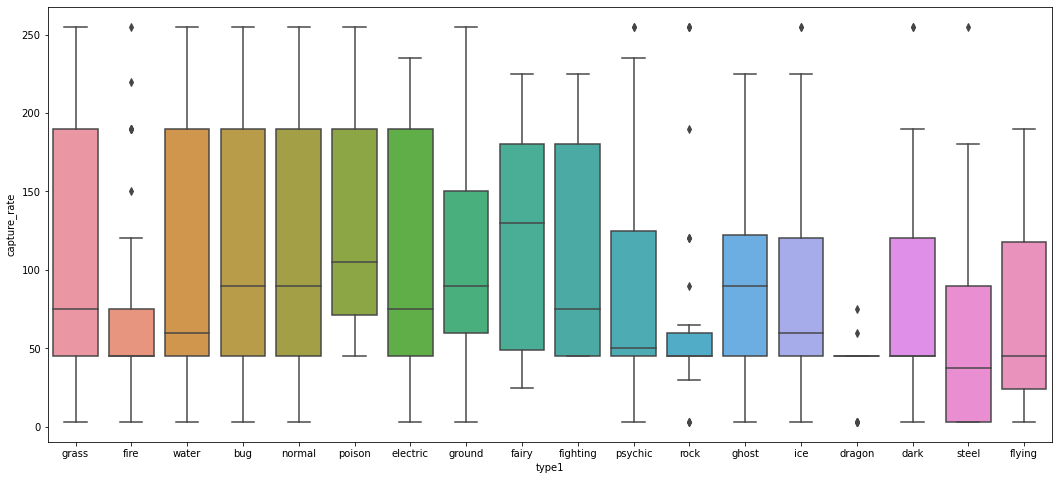

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(18,8))
sns.boxplot(data = df_p, x='type1',y='capture_rate');

Eu sei que existe pokém que é lendário, então vou adicionar isso no meu gráfico também.

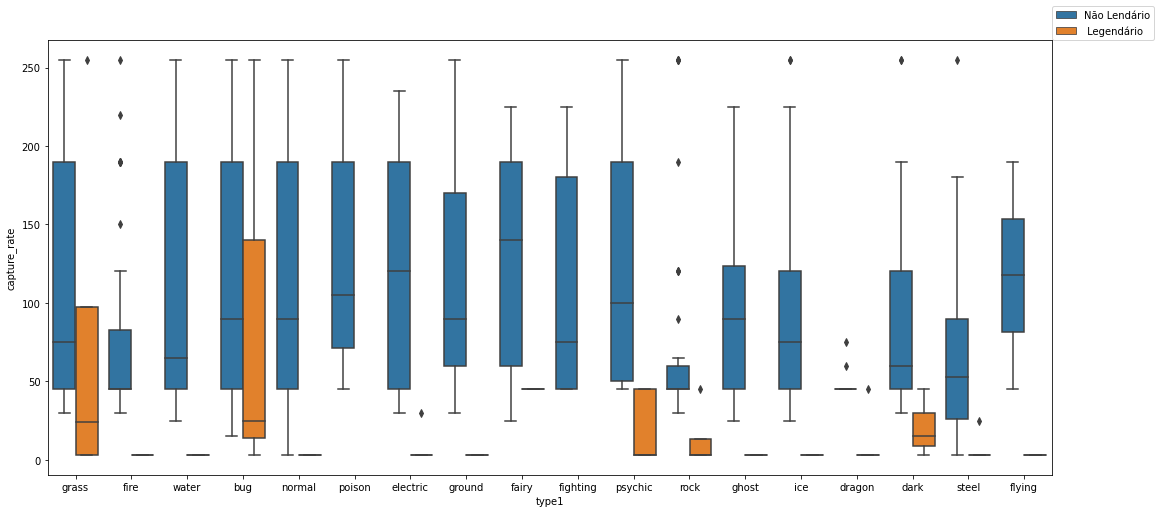

In [ ]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(data = df_p, x='type1',y='capture_rate', hue='is_legendary')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não Lendário', ' Legendário'], loc=(1,1))

plt.show()


- NãoLendários: O pokémon mais fácil de capturar é do “Tipo Fada”, enquanto o mais difícil de capturar é o “Tipo Dragão”.
- Lendários:  todos são bem dificeis, porém os do tipo grama e inseto são os mais fáceis.

## 7)Qual é o tipo primário mais comum ?

In [ ]:
tipo1.head()

,generation,type1,qtd
0,3,ghost,4
1,7,bug,9
2,2,grass,9
3,3,grass,12
4,5,flying,1


In [ ]:
tipo1_ = tipo1.groupby('type1').agg({'qtd':'sum'}).reset_index()
tipo1_.sort_values(by = 'qtd', ascending=False, inplace = True)
tipo1_.reset_index(drop = True)

,type1,qtd
0,water,114
1,normal,105
2,grass,78
3,bug,72
4,psychic,53
5,fire,52
6,rock,45
7,electric,39
8,ground,32
9,poison,32


In [ ]:
tipo1_.plot.bar(x = 'type1', y = 'qtd')

Dos 18 tipos primários que existem, o mais comum é o tipo água

## 8) Qual é o tipo secundário mais comum ?

In [ ]:
tipo2 = df.groupby('type2').agg({'name': 'count'}).reset_index()
tipo2.rename(columns = {'name': 'qtd'}, inplace = True)
tipo2.sort_values(by = 'qtd', ascending=False, inplace = True)
tipo2.reset_index(drop = True)

,type2,qtd
0,NA,384
1,flying,95
2,ground,34
3,poison,34
4,fairy,29
5,psychic,29
6,fighting,25
7,steel,22
8,dark,21
9,grass,20


In [ ]:
tipo2.plot.bar(x = 'type2', y = 'qtd')

O mais normal é não existir um segundo tipo.<br>

Porém considerando somente os pokémon que possuim um segundo tipo, o mais com é o tipo voador

## 9) Qual tipo é o mais provável de ser um Pokémon lendário?

In [ ]:
lendario = df[df['is_legendary']==1]
lendario = lendario[['name','type1','type2']].reset_index (drop = True)
lendario.head()

,name,type1,type2
0,Articuno,ice,flying
1,Zapdos,electric,flying
2,Moltres,fire,flying
3,Mewtwo,psychic,NA
4,Mew,psychic,NA


In [ ]:
lendario['type'] = lendario['type1'] + '_' + lendario['type2']
lendario.head()

,name,type1,type2,type
0,Articuno,ice,flying,ice_flying
1,Zapdos,electric,flying,electric_flying
2,Moltres,fire,flying,fire_flying
3,Mewtwo,psychic,NA,psychic_NA
4,Mew,psychic,NA,psychic_NA


In [ ]:
t1 = lendario.groupby('type1').agg({'name':'count'}).rename(columns = {'name':'qtd'})
t1.sort_values(by = 'qtd', ascending=False, inplace = True)
t1.head()

,qtd
type1,
psychic,17
dragon,7
steel,6
water,6
electric,5


In [ ]:
t2 = lendario.groupby('type2').agg({'name':'count'}).rename(columns = {'name':'qtd'})
t2.sort_values(by = 'qtd', ascending=False, inplace = True)
t2.head()

,qtd
type2,
NA,25
flying,10
fairy,6
fighting,6
steel,4


In [ ]:
t1_t2 = lendario.groupby('type').agg({'name':'count'}).rename(columns = {'name':'qtd'})
t1_t2.sort_values(by = 'qtd', ascending=False, inplace = True)
t1_t2.head()

,qtd
type,
psychic_NA,10
water_NA,3
normal_NA,2
electric_NA,2
fire_flying,2


In [ ]:
fig = (make_subplots(rows=3, cols=1)
       .add_trace(t1[0:10].plot.bar().data[0], row=1, col=1)
       .add_trace(t2[0:10].plot.bar().data[0], row=2, col=1)
       .add_trace(t1_t2[0:10].plot.bar().data[0], row=3, col=1))



fig.update_layout(autosize=False,
                  width=1000,
                  height=1000)

fig['layout']['xaxis']['title']= 'Tipo Primário'
fig['layout']['xaxis2']['title']= 'Tipo Secundário'
fig['layout']['xaxis3']['title']= 'Combinação dois 2 tipos'

fig.show()

Pela análise gráfica o tipo mais propavel de ser um lendário é um pokémon que não tenha um segundo tipo e que o primário seja psíquico.

## 10) Qual é o pokémon mais forte? E o mais fraco?

Aqui vou considerar o base_total, que é soma das estatísticas básicas de um pokémon, para determinar o poder dele.

In [ ]:
df_forte = df[['name','base_total']].sort_values(by = 'base_total',ascending=False)
df_forte[0:10]

,name,base_total
149,Mewtwo,780
383,Rayquaza,780
381,Kyogre,770
382,Groudon,770
492,Arceus,720
717,Zygarde,708
247,Tyranitar,700
372,Salamence,700
375,Metagross,700
379,Latias,700


In [ ]:
df_forte[0:10].plot.bar(x = 'name', y = 'base_total')

In [ ]:
df_fraco = df[['name','base_total']].sort_values(by = 'base_total')
df_fraco[0:10]

,name,base_total
190,Sunkern,180
297,Azurill,190
400,Kricketot,194
9,Caterpie,195
12,Weedle,195
264,Wurmple,195
279,Ralts,198
128,Magikarp,200
348,Feebas,200
663,Scatterbug,200


In [ ]:
df_fraco[0:10].plot.bar(x = 'name', y = 'base_total')

Os dois pokémon mais fortes são Mewtwo e Rayquaza, ambos com 780 pontos.

O pokémon mais fraco é o Sunkern, com 180 pontos.

Comparação entre os as estatíticas dos mais fortes pokémons. <br>
Vou add o Arceus, que é o pokémon lendário mais forte, para compreender o que diferente entre eles

In [ ]:
mewtwo = df[df.name == 'Mewtwo'][['name','hp', 'attack', 'defense', 'sp_attack' ,'sp_defense', 'speed']]
mewtwo

,name,hp,attack,defense,sp_attack,sp_defense,speed
149,Mewtwo,106,150,70,194,120,140


In [ ]:
rayquaza = df[df.name == 'Rayquaza'][['name','hp', 'attack', 'defense', 'sp_attack' ,'sp_defense', 'speed']]
rayquaza

,name,hp,attack,defense,sp_attack,sp_defense,speed
383,Rayquaza,105,180,100,180,100,115


In [ ]:
arceus = df[df.name == 'Arceus'][['name','hp', 'attack', 'defense', 'sp_attack' ,'sp_defense', 'speed']]
arceus

,name,hp,attack,defense,sp_attack,sp_defense,speed
492,Arceus,120,120,120,120,120,120


In [ ]:
fortes= ps.concat ([mewtwo, rayquaza, arceus])
fortes.style.background_gradient(cmap="PuBu")

,name,hp,attack,defense,sp_attack,sp_defense,speed
149,Mewtwo,106,150,70,194,120,140
383,Rayquaza,105,180,100,180,100,115
492,Arceus,120,120,120,120,120,120


Análisando os dados, vemos que:
- Arceus: HP, Desefa, impata em defesa especial com Mewtwo
- Rayquaza: Ataque
- Mewtwo:Ataque especial e impata em defesa especial com Arceus